In [1]:
import os,sys
sys.path.append("../notebook_utilities/")
from analysis_common import *

In [2]:
from root_common import *

Welcome to JupyROOT 6.30/06


In [3]:
import pandas as pd
import dask.dataframe as dd

In [4]:
import glob

In [8]:
# Pattern to match the ROOT files
file_pattern = "/Users/wketchum/Data/LDMX/production_07Jan2024/*_ana.root"

# List to hold the DataFrames
dfs = []

In [9]:
# Loop through each file matching the pattern
for filename in glob.glob(file_pattern)[:10]:
    print(filename)
    # Open the ROOT file
    with uproot.open(filename) as file:
        # Extract the TTree named "ana_tree"
        tree = file["ana_tree"]
        
        df = tree.arrays(library="pd")
        
        # Convert Pandas DataFrame to Dask DataFrame
        #ddf = dd.from_pandas(df, npartitions=1)  # Adjust npartitions based on your dataset/cluster
        #dfs.append(ddf)
        dfs.append(df)

# Concatenate all Dask DataFrames into a single DataFrame
#combined_ddf = dd.multi.concat(dfs, axis=0)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101228_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101074_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101124_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101282_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101063_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101133_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101211_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101206_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_101286_reco_ana.root
/Users/wketchum/Data/LDMX/production_07Jan2024/ldmx_genie_G18_02a_02_11b_Ti_8GeV_1

In [10]:
combined_df = pd.concat(dfs[:2],ignore_index=True)

In [11]:
# Generating logarithmically spaced bins
x_bins = np.logspace(np.log10(0.1), np.log10(10), 40)
y_bins = np.logspace(np.log10(0.01), np.log10(20), 40)

In [12]:
%matplotlib inline

In [13]:
combined_df["q_2"] = combined_df["elec_px"]*combined_df["elec_px"]+combined_df["elec_py"]*combined_df["elec_px"]+(8000-combined_df["elec_pz"])*(8000-combined_df["elec_pz"])

In [14]:
combined_df["Q2"] = combined_df["q_2"]-(8000-combined_df["elec_e"])*(8000-combined_df["elec_e"])

In [15]:
combined_df["w"] = (8000-combined_df["elec_e"])

In [16]:
combined_df

,run,event,elec_px,elec_py,elec_pz,elec_pt,elec_p,elec_e,elec_thetaz,genie_tgtZ,...,sim_cal_et,hcal_e,hcal_et,ecal_e,ecal_et,cal_e,cal_et,q_2,Q2,w
0,101228,1,-126.748077,-243.614360,7904.596206,274.614332,7909.364969,7909.364985,0.034727,22,...,2182.681985,0.805906,0.493062,8088.902650,789.448015,8089.708556,789.533251,5.604461e+04,47829.904559,90.635015
1,101228,2,393.613482,-100.958079,6348.397801,406.354657,6361.389687,6361.389708,0.063922,22,...,8316.222269,58.175774,16.924116,6529.321621,677.306206,6587.497395,661.512645,2.842983e+06,157939.244648,1638.610292
2,101228,3,213.591805,-225.015048,7916.074021,310.247048,7922.151295,7922.151311,0.039172,22,...,356.279442,0.000000,0.000000,8777.559959,140.369961,8777.559959,140.369961,4.603659e+03,-1456.759564,77.848689
3,101228,4,66.264543,213.760456,7920.909260,223.795716,7924.070168,7924.070185,0.028246,22,...,3007.454458,0.953929,0.476993,9231.102705,1221.185619,9232.056635,1221.164645,2.481107e+04,19045.736963,75.929815
4,101228,5,105.886539,-276.677770,7924.491600,296.247443,7930.027091,7930.027107,0.037366,22,...,2212.582334,0.098682,0.069569,7791.007895,790.195130,7791.106577,790.247202,-1.238297e+04,-17279.179564,69.972893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,101074,19996,147.235013,-24.628319,7950.854133,149.280619,7952.255413,7952.255429,0.018773,22,...,2067.971544,0.213812,0.181427,8931.489147,852.480577,8931.702958,852.398710,2.046731e+04,18187.770459,47.744571
39996,101074,19997,80.741299,-354.622116,6704.596520,363.697680,6714.453849,6714.453869,0.054193,22,...,10901.178380,30.344823,5.760997,5963.651974,527.403721,5993.996798,528.770538,1.655957e+06,3327.828263,1285.546131
39997,101074,19998,215.887591,13.620817,5328.228972,216.316848,5332.618209,5332.618233,0.040576,22,...,14112.241806,98.747280,29.852204,5816.569421,180.187487,5915.316700,193.476333,7.187908e+06,72982.951818,2667.381767
39998,101074,19999,-141.864546,4.693917,7951.088865,141.942179,7952.355734,7952.355751,0.017850,22,...,647.262922,0.000000,0.000000,8458.731410,240.417778,8458.731410,240.417778,2.185195e+04,19581.973558,47.644249


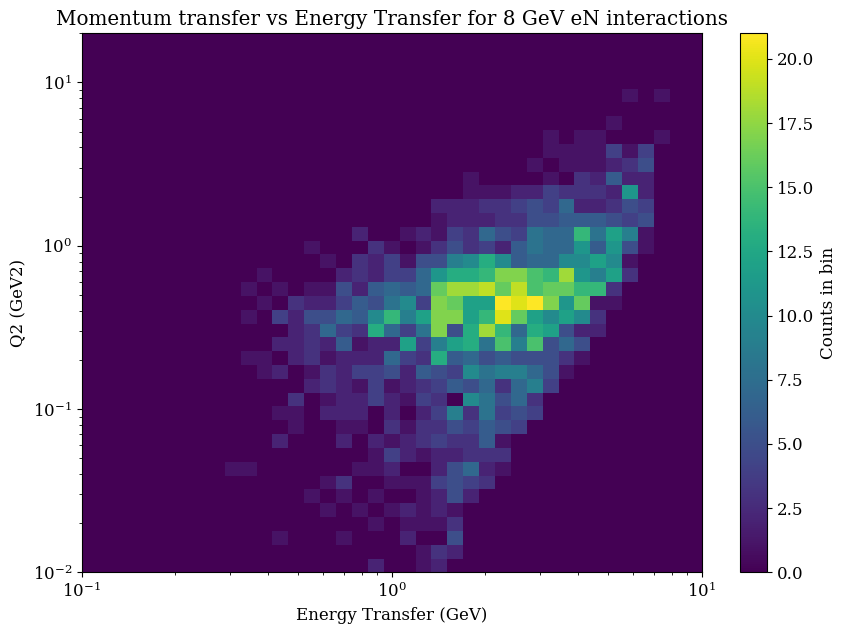

In [17]:
filtered_df = combined_df.query("elec_pt>500 and genie_dis==1")

# Creating the 2D histogram plot
plt.figure(figsize=(10, 7))
plt.hist2d(filtered_df["w"]/1e3, filtered_df["Q2"]/1e6, bins=[x_bins, y_bins], cmap='viridis')
plt.colorbar(label='Counts in bin')

# Setting the scale to logarithmic if necessary
plt.xscale('log')
plt.yscale('log')

# Setting labels and title
plt.xlabel('Energy Transfer (GeV)')
plt.ylabel('Q2 (GeV2)')
plt.title('Momentum transfer vs Energy Transfer for 8 GeV eN interactions')

# Display the plot
plt.show()

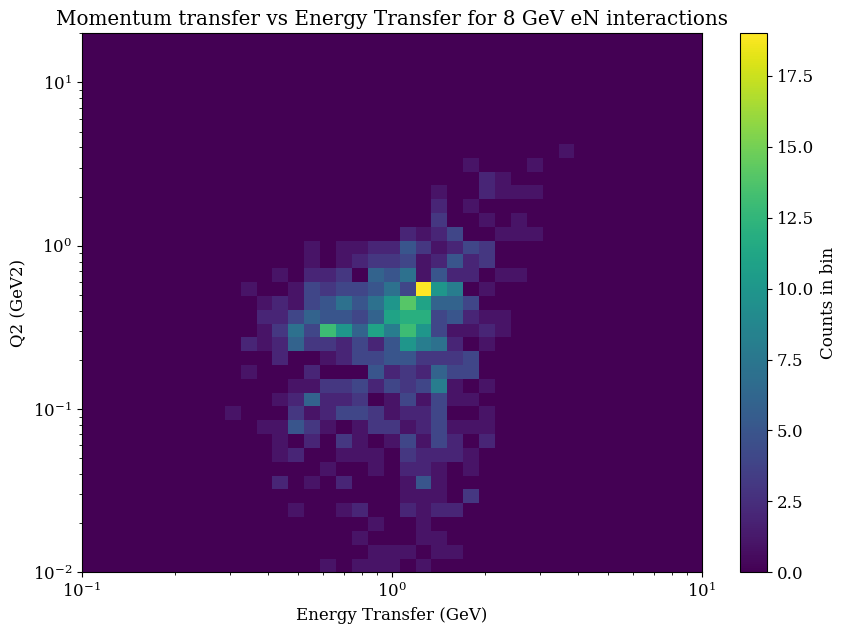

In [18]:
filtered_df = combined_df.query("elec_pt>500 and genie_res==1")

# Creating the 2D histogram plot
plt.figure(figsize=(10, 7))
plt.hist2d(filtered_df["w"]/1e3, filtered_df["Q2"]/1e6, bins=[x_bins, y_bins], cmap='viridis')
plt.colorbar(label='Counts in bin')

# Setting the scale to logarithmic if necessary
plt.xscale('log')
plt.yscale('log')

# Setting labels and title
plt.xlabel('Energy Transfer (GeV)')
plt.ylabel('Q2 (GeV2)')
plt.title('Momentum transfer vs Energy Transfer for 8 GeV eN interactions')

# Display the plot
plt.show()

In [ ]:
ana_files = glob.glob('/Users/wketchum/Data/LDMX/production_07Jan2024/*_ana.root')
ana_files.sort()

In [ ]:
ana_tree = ROOT.TChain("ana_tree")

In [ ]:
ana_tree.Add('/Users/wketchum/Data/LDMX/production_07Jan2024/*_ana.root')

In [ ]:
c = ROOT.TCanvas("c")

In [ ]:
for obj in ana_tree.GetListOfBranches():
    print(obj)

In [ ]:
ana_tree.Draw("elec_pt")
c.Draw()

In [ ]:
ana_tree.Draw("(elec_px*elec_px)+(elec_py*elec_py)+(8000-elec_pz)*(8000-elec_pz)","elec_pt>500")
c.Draw()

In [ ]:
ana_tree.Draw("elec_e:elec_pt","1","colz")
c.Draw()

In [ ]:
ana_tree.Draw("((elec_px*elec_px)+(elec_py*elec_py)+(8000-elec_pz)*(8000-elec_pz)-(8000-elec_e)*(8000-elec_e))/1e6:(8000-elec_e)/1e3","1","colz")
c.Draw()